In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [37]:
df = pd.read_csv("Mall_Customers.csv")
text_columns = ["CustomerID", "Gender"]
df = df.drop(text_columns,axis=1)
df = df.drop_duplicates()
impute = SimpleImputer(strategy="mean")
df_impute = pd.DataFrame(impute.fit_transform(df), columns=df.columns)

standard = StandardScaler()
x_scaled = standard.fit_transform(df_impute)


In [44]:
kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [47]:
centroid = kmean.cluster_centers_
centroid
labels = kmean.labels_
labels

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

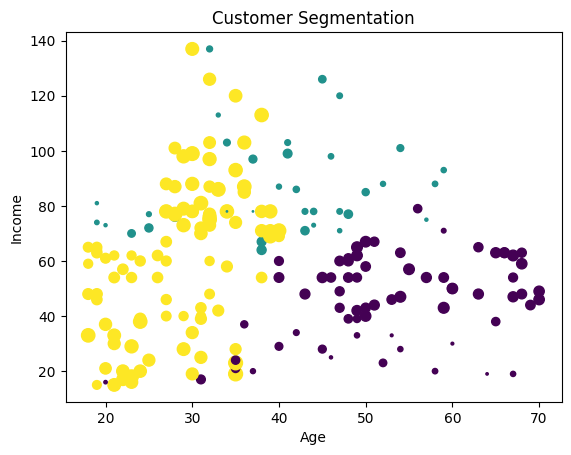

In [52]:
plt.scatter(df["Age"], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels)
plt.title("Customer Segmentation")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

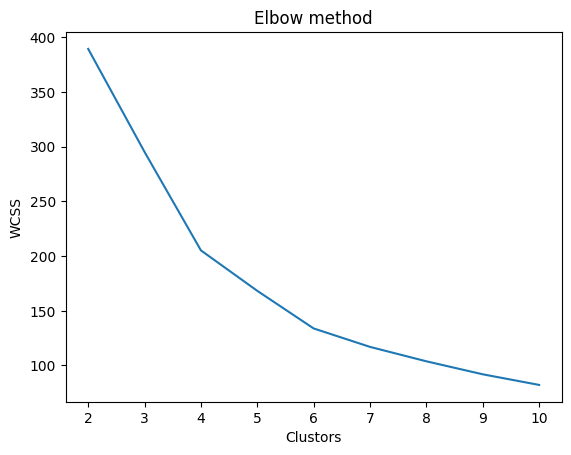

In [58]:
wcss=[]
k_values = range(2,11)
for k in k_values:
    kmean = KMeans(n_clusters=k, max_iter=300, init="k-means++", n_init=10, random_state=0)
    kmean.fit(x_scaled)
    wcss.append(kmean.inertia_)

plt.plot(range(2,11), wcss)
plt.title("Elbow method")
plt.xlabel("Clustors")
plt.ylabel("WCSS")
plt.show()

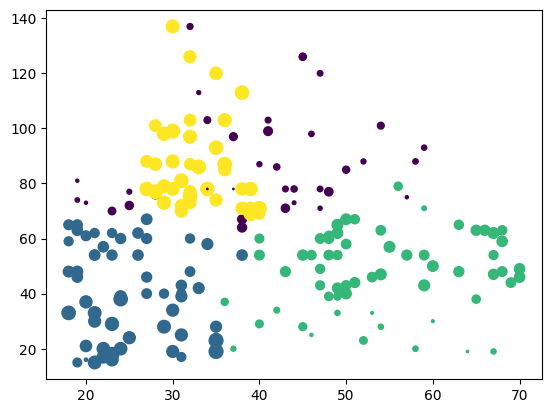

In [70]:
kmean = KMeans(n_clusters=4, init="k-means++", random_state=0, n_init=10, max_iter=300)
kmean.fit(x_scaled)
kmean.predict(x_scaled)
centroids = kmean.cluster_centers_
labels = kmean.labels_

plt.scatter(df["Age"], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels)